# Numerična matematika - domača naloga 2
Gregor Kovač

# 1. Naloga s funkcijo
## Porazdelitvena funkcija normalne slučajne spremenljivke 

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from normal import std_normal_integral, std_normal
from hipotrohoida import h, hipotrohoida, trikotnik

In [8]:
std_normal(-10**1)

7.69459862670642e-23

In [3]:
print(f"My solution: {std_normal_integral(1, n = 1000000):.10f}")
print(f"Scipy {norm.cdf(1):.10f}")

My solution: 0.8413447461
Scipy 0.8413447461


## 2. Naloga s števili
### Ploščina hipotrohoide

In [3]:
p = np.linspace(0, 2 * np.pi, 100)

x = lambda t: np.cos(t)
y = lambda t: np.sin(t)
dx = lambda t: -np.sin(t)
dy = lambda t: np.cos(t)

P = trikotnik(x, y, dx, dy, 0, 2 * np.pi, n = 10)

if P == np.pi:
    print("Površina, izračunana s trikotniki, je enaka površini kroga.")
    print(f"{P:.10f} == {np.pi:.10f}")
else:
    print("Površina, izračunana s trikotniki, ni enaka površini kroga.")
    print(f"{P:.10f} != {np.pi:.10f}")

t
[0.         0.62831853 1.25663706 1.88495559 2.51327412 3.14159265
 3.76991118 4.39822972 5.02654825 5.65486678 6.28318531]
x
[ 1.          0.80901699  0.30901699 -0.30901699 -0.80901699 -1.
 -0.80901699 -0.30901699  0.30901699  0.80901699  1.        ]
y
[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01 -2.44929360e-16]
dx
[-0.00000000e+00 -5.87785252e-01 -9.51056516e-01 -9.51056516e-01
 -5.87785252e-01 -1.22464680e-16  5.87785252e-01  9.51056516e-01
  9.51056516e-01  5.87785252e-01  2.44929360e-16]
dy
[ 1.          0.80901699  0.30901699 -0.30901699 -0.80901699 -1.
 -0.80901699 -0.30901699  0.30901699  0.80901699  1.        ]
f
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Površina, izračunana s trikotniki, je enaka površini kroga.
3.1415926536 == 3.1415926536


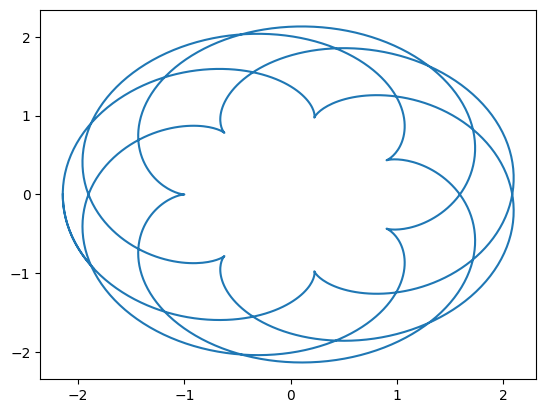

In [15]:
p = np.linspace(0, 70, 1000)

a = 1
b = - 11/7

res = h(p)

plt.plot(res[0], res[1])

hipotrohoida(a, b, 70)

plt.show()

100.89679605351009

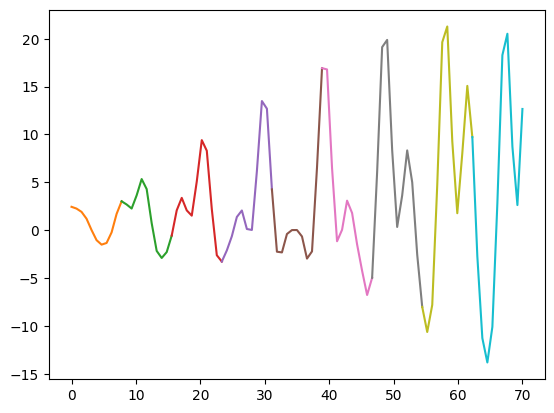

In [3]:
hipotrohoida(a, b, 70)